Step 0 Import Libraries

In [ ]:
import pandas as pd
import numpy as np

Step 1 Load IMBD

In [ ]:
movie_df=pd.read_csv("/content/IMDB-Movie-Data.csv",index_col="Title")


Step 2 View Data

In [ ]:
movie_df.head()
movie_df.head(10)
movie_df.tail(2)


Rank                  Genre  \
Title                                       
Search Party   999       Adventure,Comedy   
Nine Lives    1000  Comedy,Family,Fantasy   

                                                    Description  \
Title                                                             
Search Party  A pair of friends embark on a mission to reuni...   
Nine Lives    A stuffy businessman finds himself trapped ins...   

                      Director  \
Title                            
Search Party    Scot Armstrong   
Nine Lives    Barry Sonnenfeld   

                                                         Actors  Year  \
Title                                                                   
Search Party  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
Nine Lives    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

              Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
Title                                                                          
Search Party                 93     5.6   4881                 NaN       22.0  
Nine Lives                   87     5.3  12435               19.64       11.0

Step 3 Get Info About My Data

In [ ]:
movie_df.info()
movie_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


(1000, 11)

Step 4 Handling Duplicates

In [ ]:
temp_df = pd.concat([movie_df, movie_df])
temp_df.shape
temp_df=temp_df.drop_duplicates()
temp_df.shape
temp_df.drop_duplicates(inplace=True,keep=False)

Step 5 Column Clean Up

In [ ]:
movie_df.columns
movie_df.rename(columns={
'Runtime (Minutes)': 'Runtime',
'Revenue (Millions)': 'Revenue_millions'}, inplace=True)

movie_df.columns=['rank', 'genre', 'description', 'director',
'actors', 'year', 'runtime',
'rating', 'votes', 'revenue_millions', 'metascore']

movie_df.columns = [col.upper() for col in movie_df]
movie_df.columns = [col.lower() for col in movie_df]

Step 6 Deal With Missing Values

In [ ]:
movie_df.isnull()
movie_df.isnull().sum()

movie_df.dropna()
movie_df.dropna(axis=1)

revenue = movie_df['revenue_millions']
revenue.head()
revenue_mean = revenue.mean()
revenue.fillna(revenue_mean, inplace=True)

movie_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Step 7

Step 7 Understanding Variables

In [ ]:
movie_df.describe()

movie_df['genre'].describe()

movie_df['genre'].value_counts().head(10)

movie_df.drop(['genre', 'description', 'director', 'actors'], axis=1).corr()

rank      year   runtime    rating     votes  \
rank              1.000000 -0.261605 -0.221739 -0.219555 -0.283876   
year             -0.261605  1.000000 -0.164900 -0.211219 -0.411904   
runtime          -0.221739 -0.164900  1.000000  0.392214  0.407062   
rating           -0.219555 -0.211219  0.392214  1.000000  0.511537   
votes            -0.283876 -0.411904  0.407062  0.511537  1.000000   
revenue_millions -0.252996 -0.117562  0.247834  0.189527  0.607941   
metascore        -0.191869 -0.079305  0.211978  0.631897  0.325684   

                  revenue_millions  metascore  
rank                     -0.252996  -0.191869  
year                     -0.117562  -0.079305  
runtime                   0.247834   0.211978  
rating                    0.189527   0.631897  
votes                     0.607941   0.325684  
revenue_millions          1.000000   0.133328  
metascore                 0.133328   1.000000

Step 8 Data Frame Slicing , Selecting , Extracting

In [ ]:
genre_col = movie_df[['genre']]
type(genre_col)

subset = movie_df[['genre', 'rating']]
subset.head()

prom = movie_df.loc["Prometheus"]
prom = movie_df.iloc[1]

prom =movie_df.loc["Prometheus"]

movie_subset = movie_df.loc['Prometheus':'Sing']
movie_subset = movie_df.iloc[1:4]
movie_subset

condition = (movie_df['director'] == "Ridley Scott")
condition.head()

movie_df[movie_df['director'] == "Ridley Scott"]

movie_df[movie_df['rating'] >= 8.6].head(3)

movie_df[(movie_df['director'] =='Christopher Nolan') |
(movie_df['director'] =='Ridley Scott')].head()

movie_df[movie_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


movie_df[((movie_df['year'] >=2005) &(movie_df['year'] <=2010))
&(movie_df['rating'] >8.0)
&(movie_df['revenue_millions'] <
movie_df['revenue_millions'].quantile(0.25)) ]

rank               genre  \
Title                                           
3 Idiots              431        Comedy,Drama   
The Lives of Others   477      Drama,Thriller   
Incendies             714   Drama,Mystery,War   
Taare Zameen Par      992  Drama,Family,Music   

                                                           description  \
Title                                                                    
3 Idiots             Two friends are searching for their long lost ...   
The Lives of Others  In 1984 East Berlin, an agent of the secret po...   
Incendies            Twins journey to the Middle East to discover t...   
Taare Zameen Par     An eight-year-old boy is thought to be a lazy ...   

                                             director  \
Title                                                   
3 Idiots                              Rajkumar Hirani   
The Lives of Others  Florian Henckel von Donnersmarck   
Incendies                            Denis Villeneuve   
Taare Zameen Par                           Aamir Khan   

                                                                actors  year  \
Title                                                                          
3 Idiots               Aamir Khan, Madhavan, Mona Singh, Sharman Joshi  2009   
The Lives of Others  Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...  2006   
Incendies            Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...  2010   
Taare Zameen Par     Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...  2007   

                     runtime  rating   votes  revenue_millions  metascore  
Title                                                                      
3 Idiots                 170     8.4  238789              6.52       67.0  
The Lives of Others      137     8.5  278103             11.28       89.0  
Incendies                131     8.2   92863              6.86       80.0  
Taare Zameen Par         165     8.5  102697              1.20       42.0

Step 9 Applying Functions

In [ ]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"
movie_df["rating_category"] = movie_df["rating"].apply(rating_function)
movie_df.head(2)

rank                     genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   

                                                               description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   

                             director  \
Title                                   
Guardians of the Galaxy    James Gunn   
Prometheus               Ridley Scott   

                                                                    actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   

                         year  runtime  rating   votes  revenue_millions  \
Title                                                                      
Guardians of the Galaxy  2014      121     8.1  757074            333.13   
Prometheus               2012      124     7.0  485820            126.46   

                         metascore rating_category  
Title                                               
Guardians of the Galaxy       76.0            good  
Prometheus                    65.0             bad

Step 10 Breif Plotting

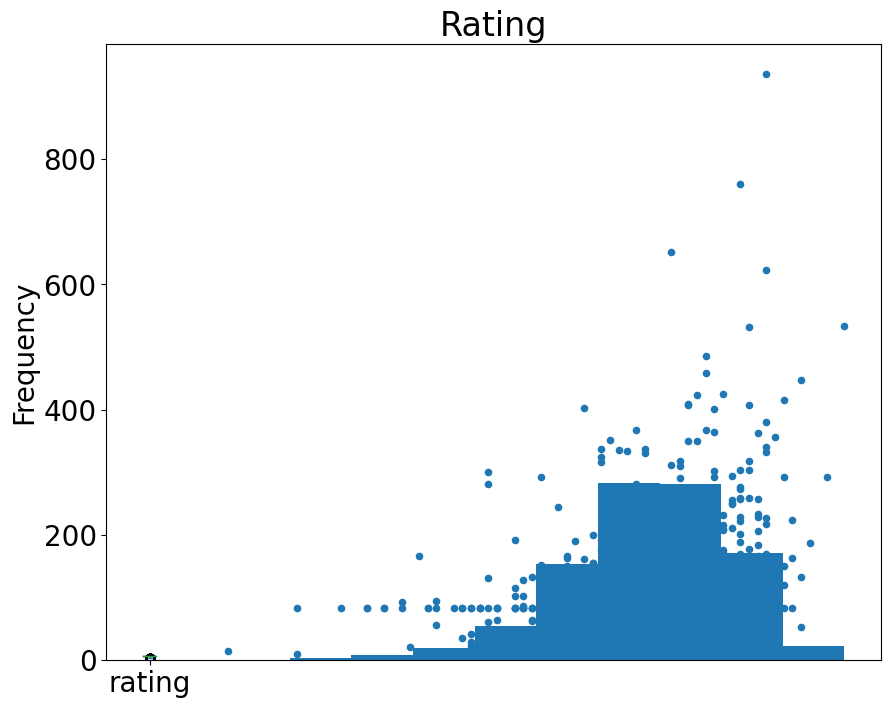

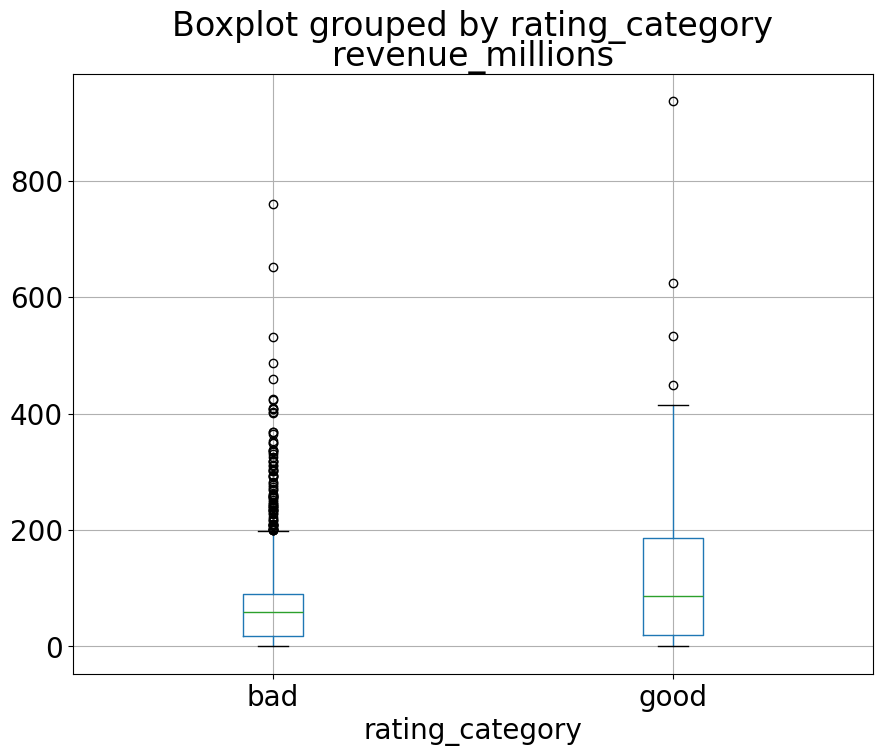

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

movie_df.plot(kind='scatter', x='rating', y='revenue_millions',
title='Revenue (millions) vs Rating');
movie_df['rating'].plot(kind='hist', title='Rating');
movie_df['rating'].plot(kind="box");
movie_df.boxplot(column='revenue_millions',
by='rating_category');